<a href="https://colab.research.google.com/github/eogbemi/airline_sentiment/blob/main/Copy_of_Yet_another_copy_of_Twitter_US_Airline_Sentiment_Problem_Statement_Submission_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



Dataset:

The dataset has the following columns:

* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

#### Objective
This project will attempt to analyse the sentiments of airline passengers in order to glean information about what passengers feel about various airlines they travel on.  It will also try to make some determinations as to why the passangers have those sentiments.

We will build and tune a predictive model that we hope will accurately predict the features that cause the sentiments which passengers express using "unseen"/test data, which in turn will provide insights for airlines to improve their services and generate more positive sentiments from their passengers by improving the travel experience.  All of this will be achieved by using the techniques of Sentiment analysis, Encoding techniques, data analysis, feature selection, data pre processing and vectorization amongst other techniques we have learnt in this module and throughout this programme.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re, string, unicodedata
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Downloading NLTL lexicons for use by VADER
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
!pip install vaderSentiment
!pip install textblob
!pip install contractions
!pip install wordcloud

from nltk.corpus import stopwords                   #Stopwords corpus
# from nltk.corpus import vader_lexicon               #vader_lexicon corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF


import contractions
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer
# set threshold for compound score, we will vary this
# def classify_compound(text, threshold=0.33):

from textblob import TextBlob
# In order to be able to view long text strings we set the option for maximum width
pd.set_option('display.max_colwidth', None)

# for plottting
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.0 MB/s eta 0:00:00


In [ ]:
# Import the datat set
data_original = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/NLP/Tweets.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
data_copy = data_original.copy()

### Exploratory Data Analysis

We will look at the dataset to determine information about the data and understand it's structure and other properties

In [ ]:
data_copy.shape

(14640, 15)

In [ ]:
# viewing the first few rows of the data
data_copy.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

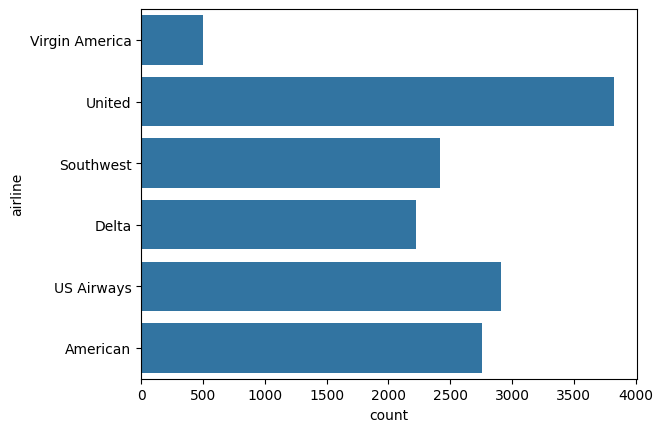

In [ ]:
# distribution of tweets accross airlines
print()
sns.countplot(data_copy['airline']);

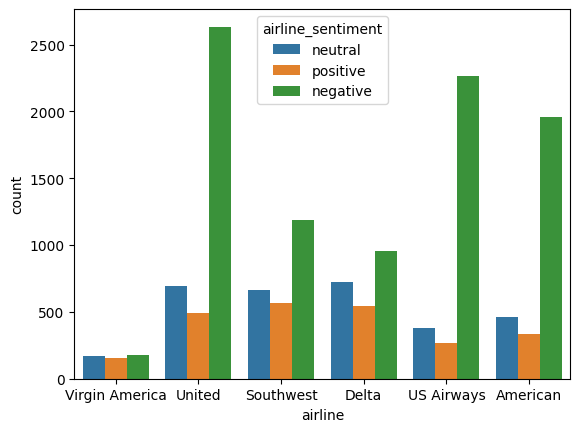

In [ ]:
# Distribution of sentiments by airline
print()
sns.countplot(x='airline', hue='airline_sentiment', data=data_copy);

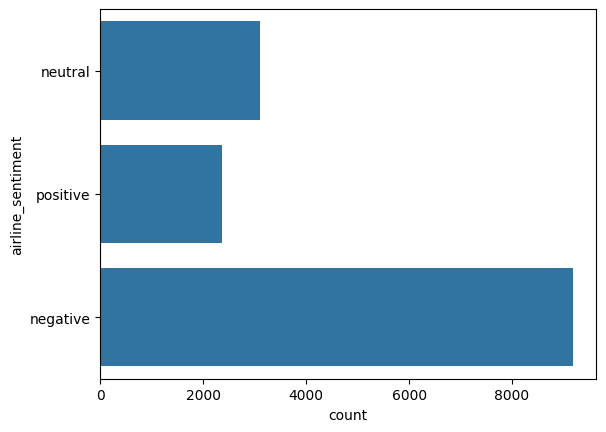

In [ ]:
sns.countplot(data_copy['airline_sentiment']);

<ipython-input-11-dde361bb7b16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data_copy['negativereason'],data=data_copy,palette='magma')
<ipython-input-11-dde361bb7b16>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")  #it will rotate text on x axis


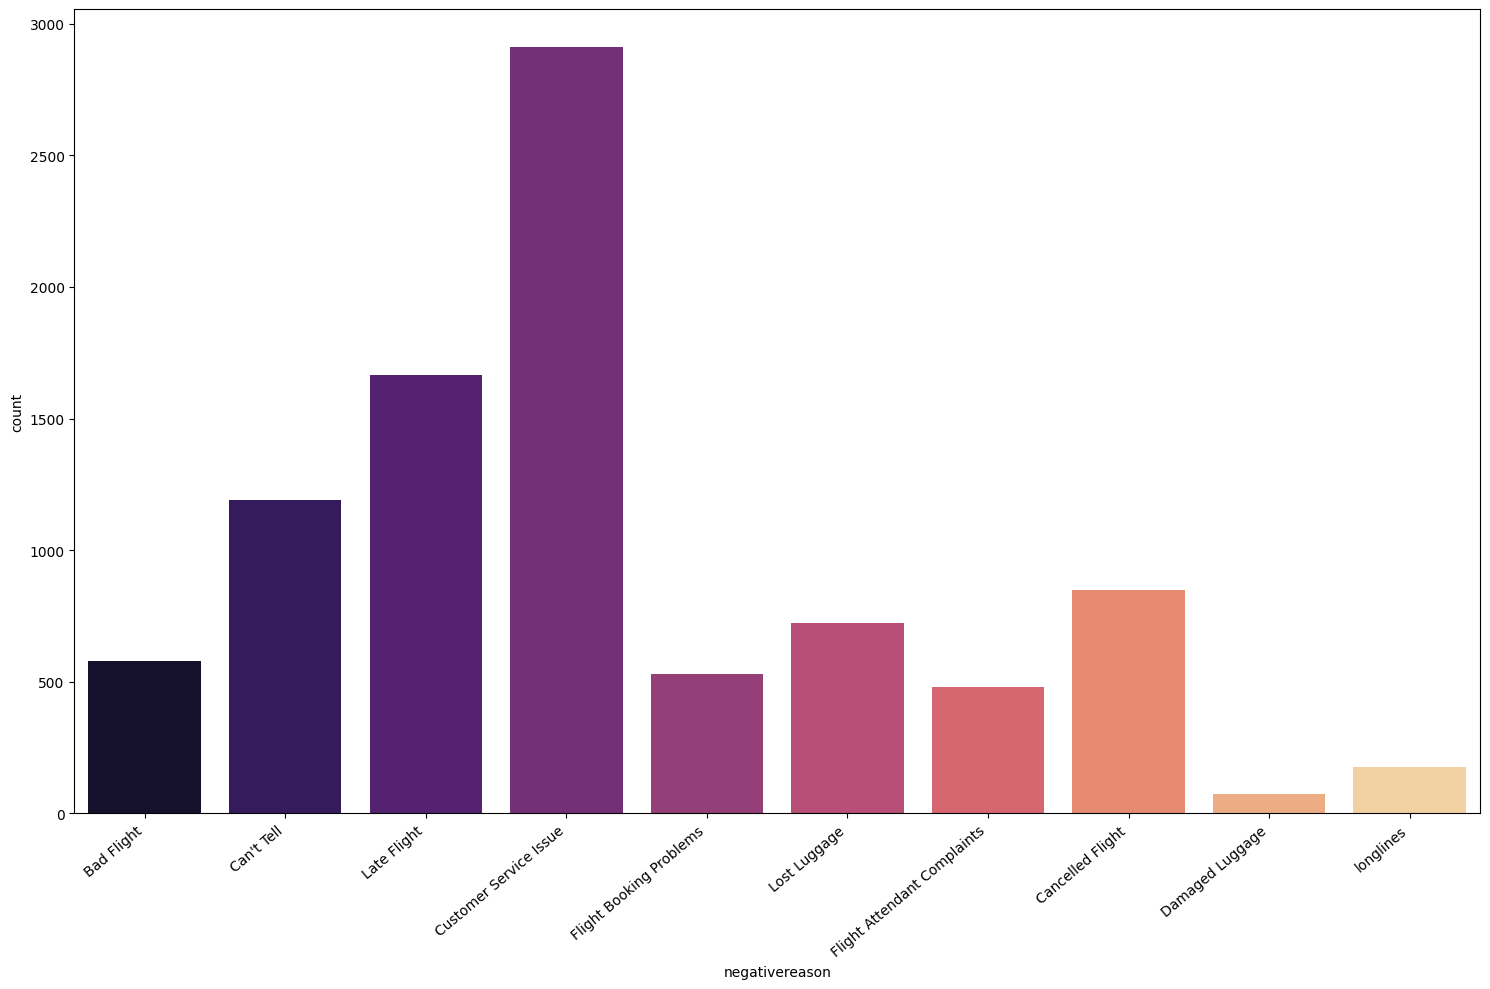

In [ ]:
plt.figure(figsize=(15,10)) #adjust the size of plot
ax=sns.countplot(x=data_copy['negativereason'],data=data_copy,palette='magma')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")  #it will rotate text on x axis

plt.tight_layout()
plt.show()

In [ ]:
data_copy.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Observations

It may be useful to note that the dataset comprises of not just the scraped data from the tweets of users, but also contains sentiment analysis that has already been carried out, some of which may be inaccurate.

For example when viewed in an excel spreadsheet, for row 84 with tweet_id 569933405506310000, the "airline_sentiment" is classified as "negative" with a confidence of almost 70%.  Further, the reason for the negative classification is given in the feature "negativereason" as "Late Flight".  However if we examine the actual tweet by the customer, in the feature "text" the tweet is **"@VirginAmerica you're the best!! Whenever I (begrudgingly) use any other airline I'm delayed and Late Flight".**  This actually appears to be more of a positive sentiment about Virgin America than a negative sentiment even though the words "Late Flight' appear in the tweet.

###

There are several features that we will drop which have no utility for our analysis, these include tweet_id, negativereason_confidence, airline_sentiment_gold, name, negativereason_gold, retweet_count, tweet_coord, tweet_created, tweet_location, user_timezone

In [ ]:
# dropping the columns we dp not require for this part of the analysis
data_copy.drop(["tweet_id", "negativereason", "negativereason_confidence", "airline_sentiment_gold", "name", "negativereason_gold", "retweet_count", "tweet_coord", "tweet_created", "tweet_location", "user_timezone"], axis=1, inplace=True)

In [ ]:
data_copy.shape

(14640, 4)

In [ ]:
data_copy.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing about it
5,negative,1.0000,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0.6745,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0.6340,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0.6559,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


### We will now clean up the text data to remove nonalphabetical characters like @ signs, numbers and replace contractions.  We will also Lemmatize and Tokenize the text data as well as remove stopwords.  From reviewing the data however, we notice that the text (that is the tweets) always begins with the twitter handle of the airline eg @united, @VirginAmerica etc, so rather than remove just the @ sign, we will remove the whole twitter handle for the 6 airlines from the text feature

In [ ]:
from nltk.tokenize import TweetTokenizer
# tknzr = TweetTokenizer(strip_handles=True)

# result = tknzr.tokenize(text)

In [ ]:
# print(result)


In [ ]:
#  We will rermove the tweet handles for the airlines
import re

def remove_twitter_handles(text):
    text = re.sub('@[^\s]+','',text)
#    text = re.sub('http[^\s]+','',text)
    return text
data_copy['text'] = data_copy['text'].apply(remove_twitter_handles)

In [ ]:
data_copy.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,What said.
1,positive,0.3486,Virgin America,plus you've added commercials to the experience... tacky.
2,neutral,0.6837,Virgin America,I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,Virgin America,and it's a really big bad thing about it
5,negative,1.0000,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0.6745,Virgin America,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0.6340,Virgin America,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0.6559,Virgin America,"Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,Virgin America,"it was amazing, and arrived an hour early. You're too good to me."


### Changing the name of the text column from "text" to "passenger_tweet"

In [ ]:
data_copy.rename(columns = {'text':'passenger_tweet'}, inplace = True)

In [ ]:
data_copy.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,passenger_tweet
0,neutral,1.0000,Virgin America,What said.
1,positive,0.3486,Virgin America,plus you've added commercials to the experience... tacky.
2,neutral,0.6837,Virgin America,I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,Virgin America,and it's a really big bad thing about it
5,negative,1.0000,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,0.6745,Virgin America,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,0.6340,Virgin America,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,0.6559,Virgin America,"Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,Virgin America,"it was amazing, and arrived an hour early. You're too good to me."


### Data preprocessing

We will process the data further by converting all the words in the tweets to lower case, replace contractions, remove any numbers, remove any other stopwords, tokenize the tweets and also lemmatize them.

### Defining a function to classify

In [ ]:
def classify_compound(passenger_tweet, threshold=0.22):

    # initialize VADER
    sid = SentimentIntensityAnalyzer()

    # Calling the polarity_scores method on sid and passing in the passenger_tweet
    # outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(text)

    # get compound score
    score = scores['compound']

    # translate the score into the correcponding input according to the threshold
    if score <= -threshold: return 'Negative'
    elif score >= threshold: return 'Positive'
    else: return 'Neutral'

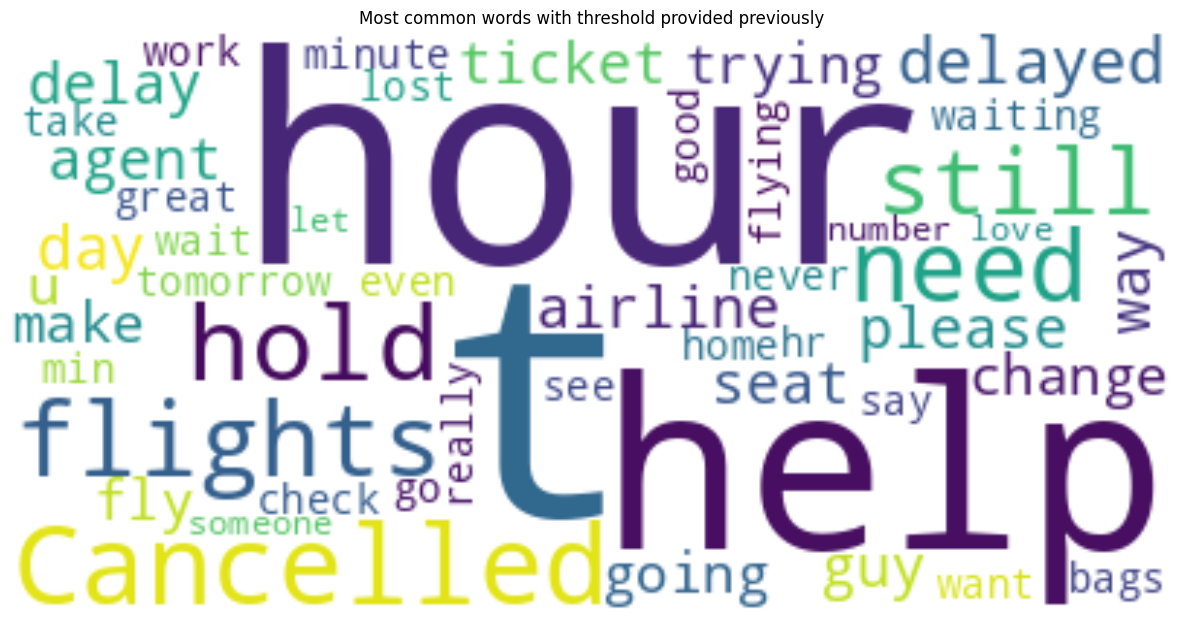

In [ ]:
# Get stopwords from wordcloud library

stopwords = set(STOPWORDS)
# stopwords = set(vader_lexicon)
# Add some extra words ad hoc for our purpose
app_words = ['flight', 'time', 'thank', 'time', 'us', 'thanks', 'now', 'plane', 'bag', 'united', 'call', 'phone', 'people', 'will', 'amp', 'service', 'co', 'customer', 'one', 'today', 'airport', 'new', 'luggage', 'got', 'told', 'know', 'back', 'gate', 'flightled']
stopwords.update(app_words)

# join all reviews
passenger_tweet = " ".join(review for review in data_copy.passenger_tweet)

# Generate wordcloud image, we are limiting it to the top 50 words
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(passenger_tweet)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words with threshold provided previously')
plt.show()

### Observation

When we first created the wordmap, we noticed that there is this very prominent word "Flightled", which is meaningless in the English language.  When we review the data in excel, we realise that it appears over 500 times in the tweets and always after the word "cancelled", so we  addrd it to the stopwords so that it is ignored.  Similarly we found several words that were prominent but not useful for the sentiment analysis, so we eliminated them by adding them to the stopwords above.

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  object 
 3   passenger_tweet               14640 non-null  object 
dtypes: float64(1), object(3)
memory usage: 457.6+ KB


In [ ]:
#creating word cloud for negative reviews
negative_reviews=data_copy[data_copy['airline_sentiment']!=0]
words = ' '.join(negative_reviews['passenger_tweet'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

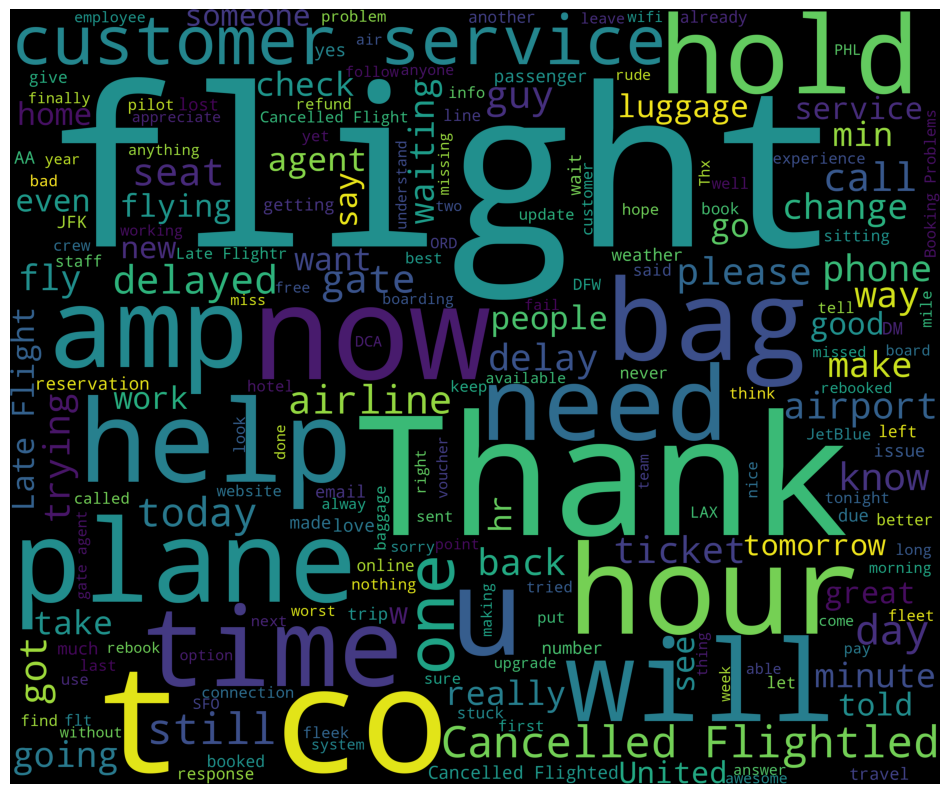

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Since our objective, as I indicated earlier, is to perform sentiment analysis based on tweets from customers, our focus will be solely on two of the columns(features) in the dataset, "airline_sentiment" which is a subjective classification of the sentiments expressed in the customer tweets and "text", the actual tweets from the customers in which we hope some sentiment is expressed.

We will therefore drop all the other columns


In [ ]:
# dropping all columns except for airline_sentiment and text
data_copy.drop(["airline_sentiment_confidence"], axis=1, inplace=True)

In [ ]:
data_copy.shape

(14640, 3)

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   passenger_tweet    14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB


In [ ]:
data_copy.isnull().sum()

airline_sentiment    0
airline              0
passenger_tweet      0
dtype: int64

In [ ]:
data_copy.head(20)

,airline_sentiment,airline,passenger_tweet
0,neutral,Virgin America,What said.
1,positive,Virgin America,plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,and it's a really big bad thing about it
5,negative,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,Virgin America,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,Virgin America,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,Virgin America,"Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"it was amazing, and arrived an hour early. You're too good to me."
